# Reading math dataset file

In [62]:
import pandas as pd
data = pd.read_csv('./Dataset/Original/student-por.csv', sep=';')
print(data.head())
data_copy = data.copy()

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]


# Missing Values

In [63]:
print(data_copy.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


# Outliers visualization

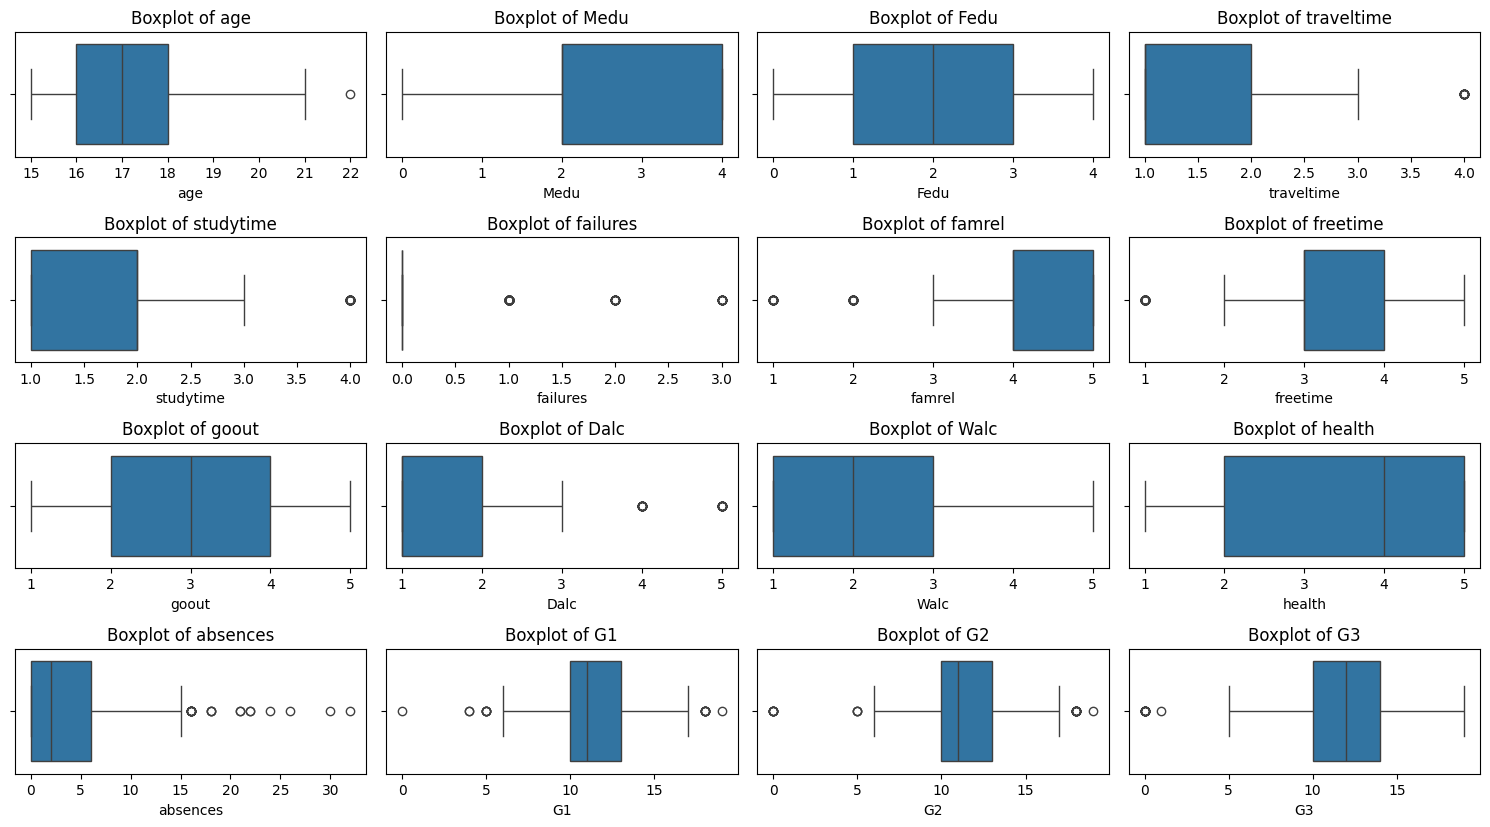

In [64]:
import seaborn as sns 
import matplotlib.pyplot as plt

numeric_cols = data_copy.select_dtypes(include='number').columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(x=data_copy[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Categorical encoding

In [65]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

categorical_cols = [
    'sex', 'school', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason',
    'guardian', 'schoolsup','famsup','paid','activities','nursery','higher','internet',
    'romantic'
]

# Label encode
for col in categorical_cols:
    data_copy[col] = encoder.fit_transform(data_copy[col])

# One-hot encode
# data_copy = pd.get_dummies(data_copy, columns=categorical_cols, drop_first=True, dtype=int)

data_copy.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,4,0,11,11
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,2,9,11,11
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,6,12,13,12
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,0,14,14,14
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,0,11,13,13


# Normalization

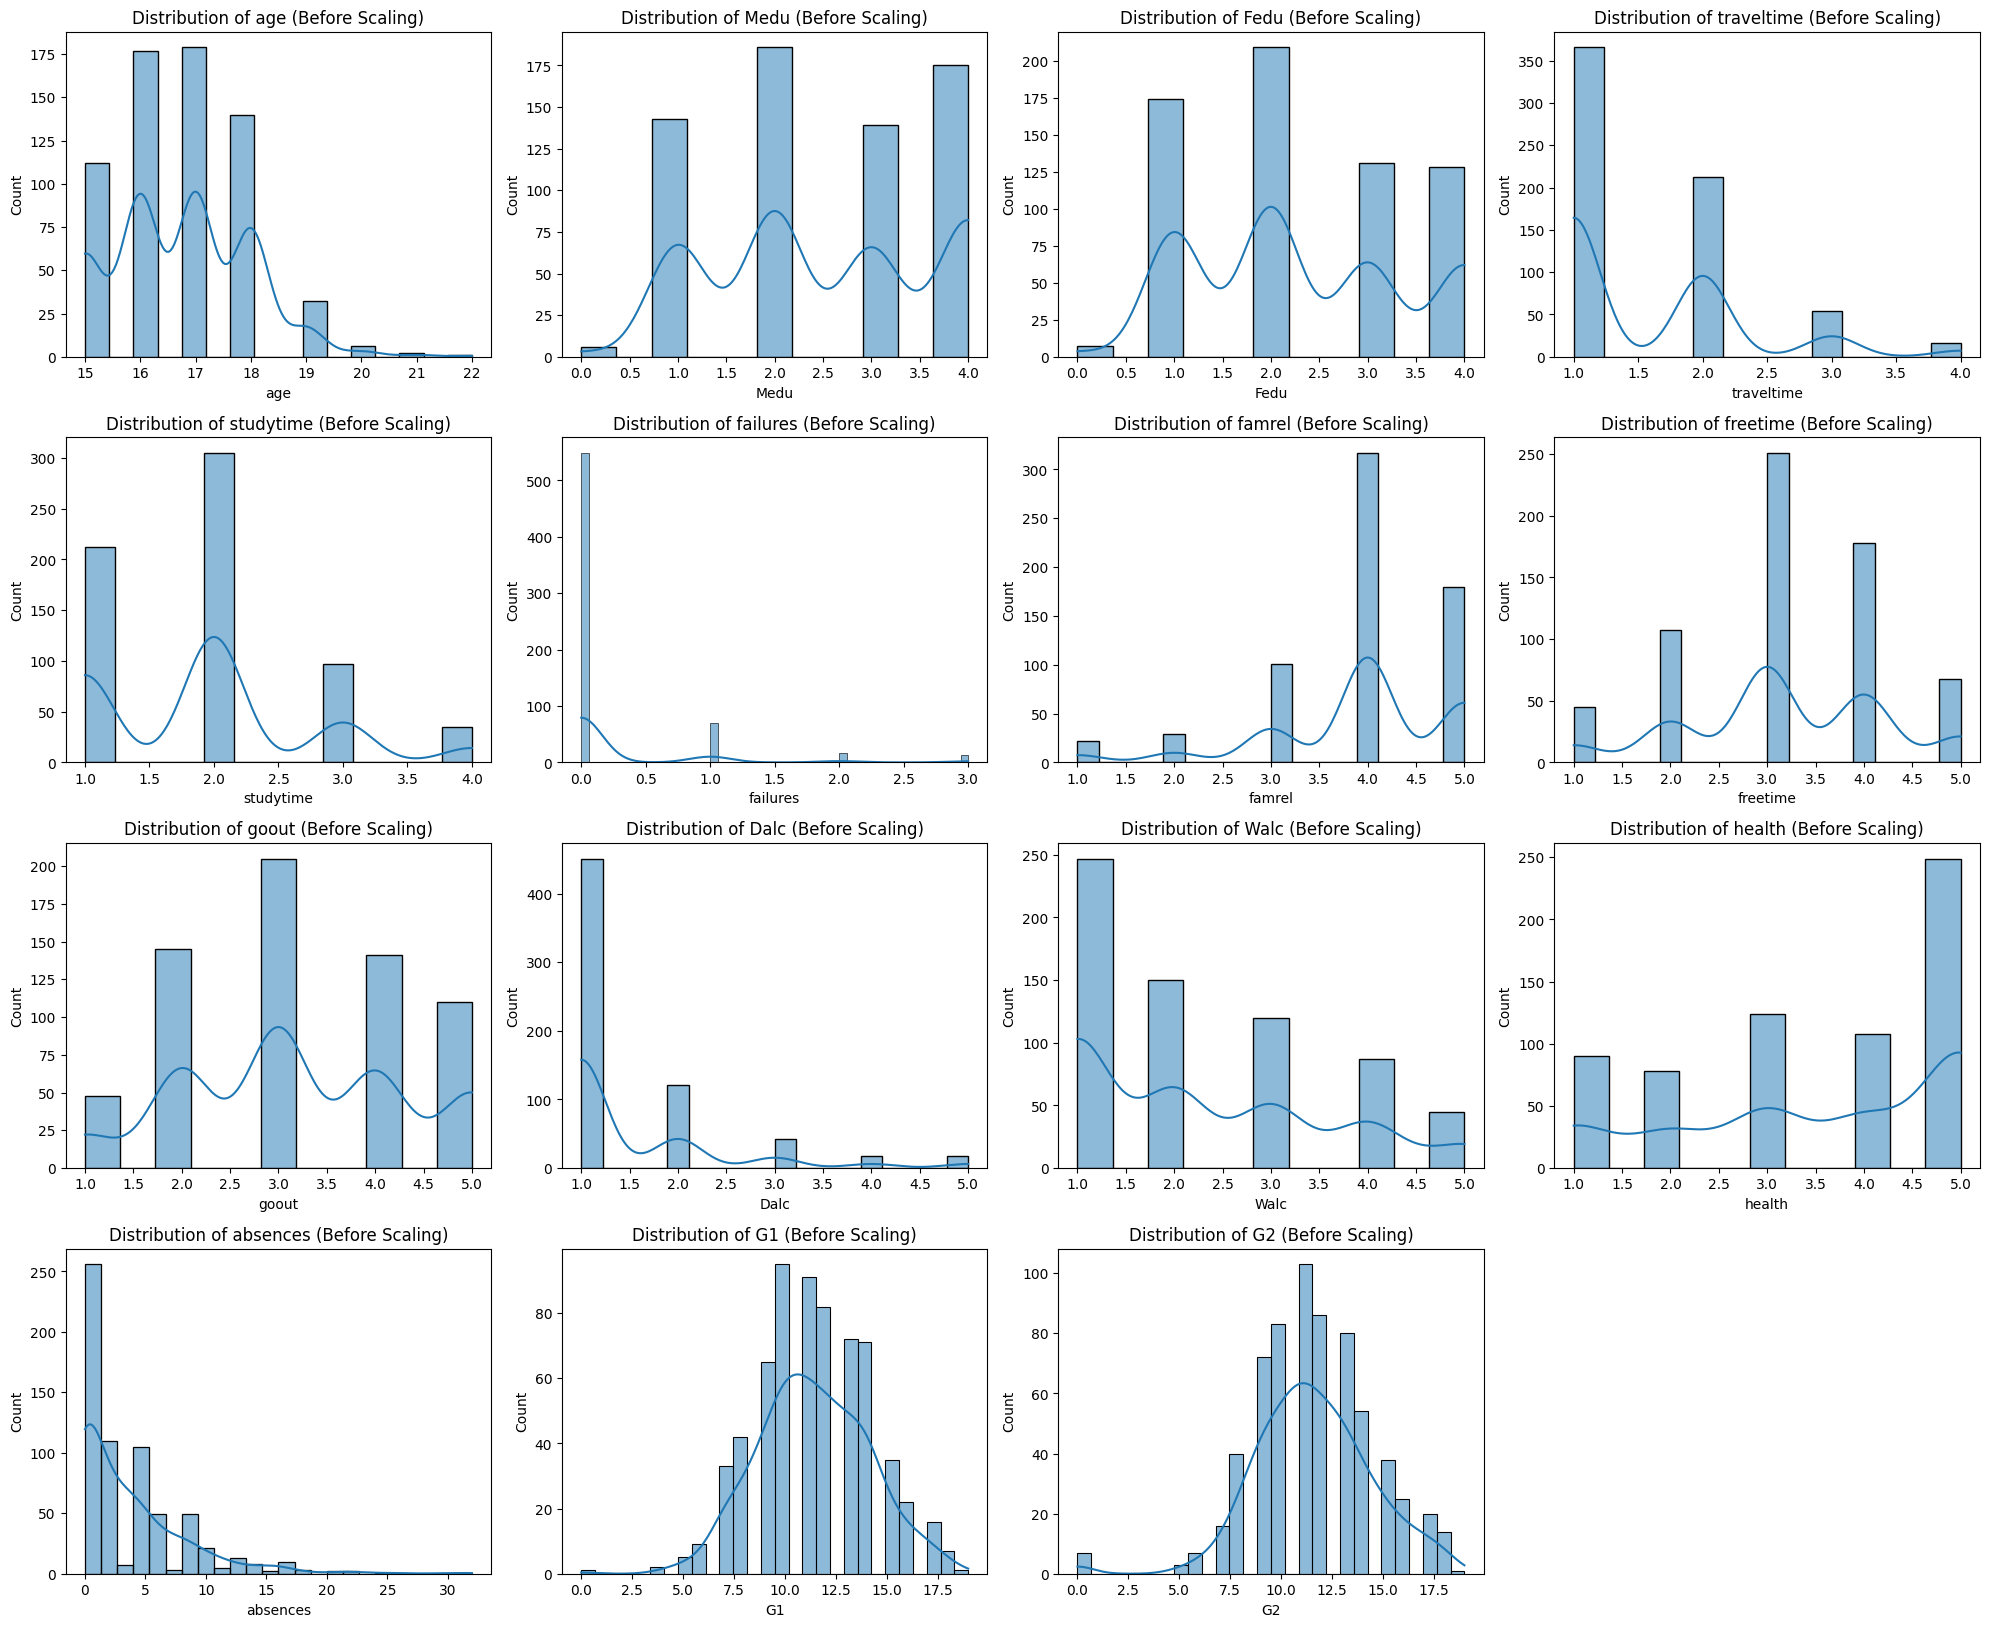

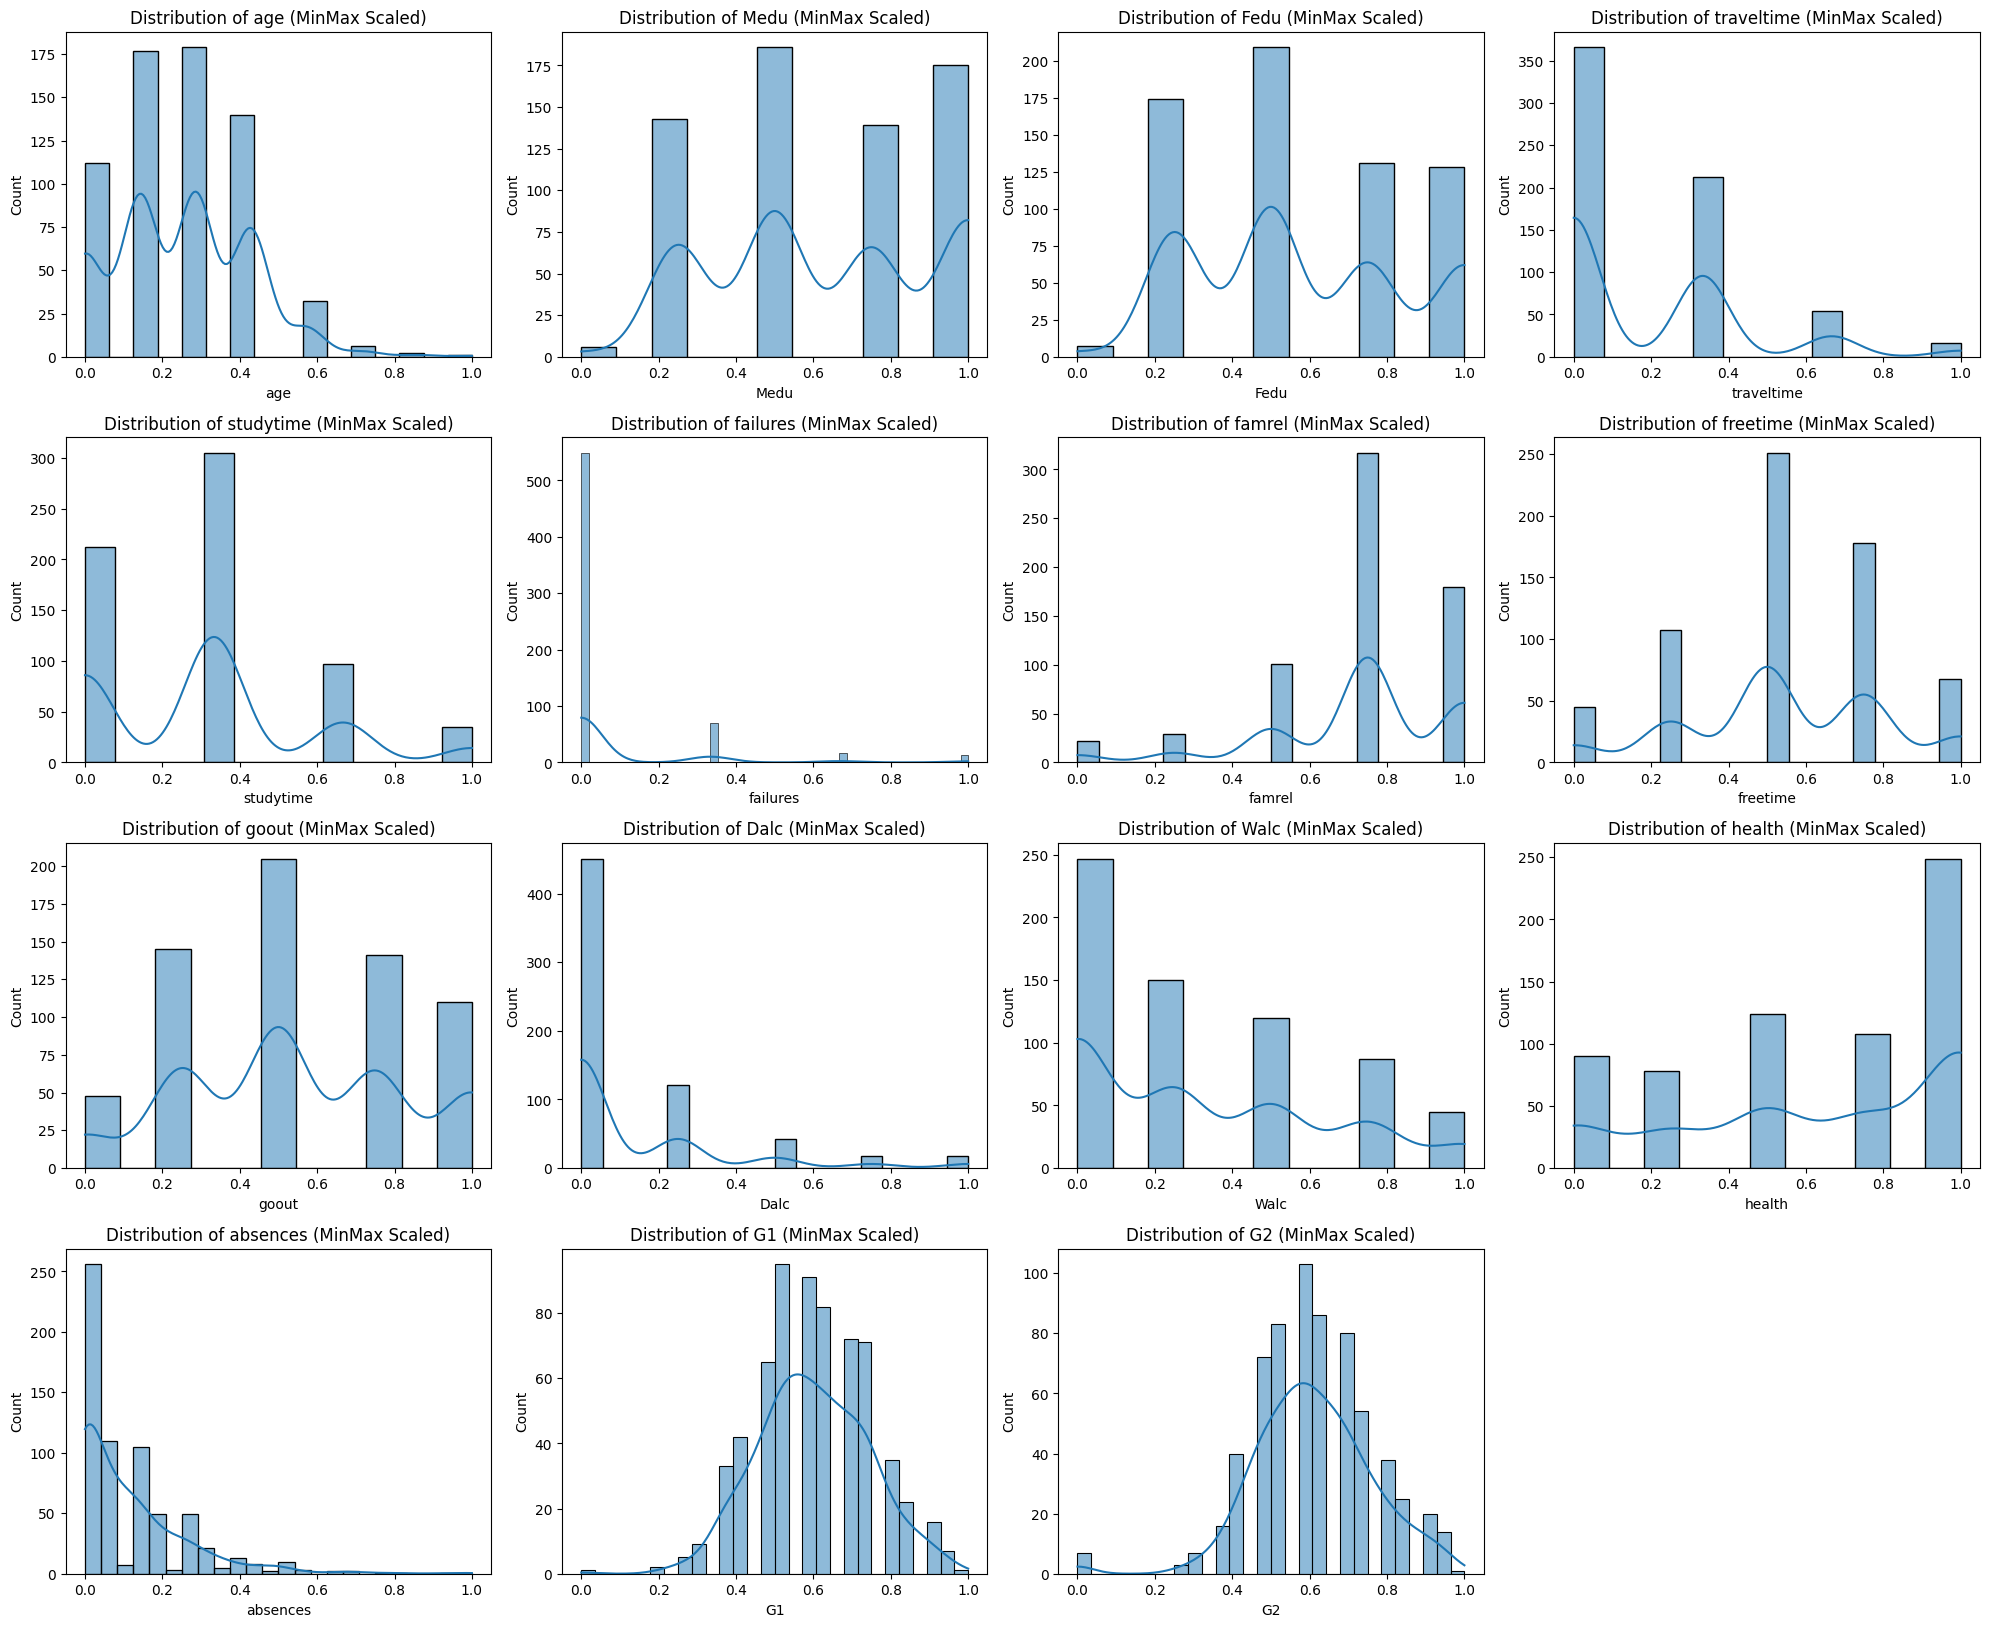

In [66]:
from sklearn.preprocessing import MinMaxScaler

numeric_cols = numeric_cols.drop(['G3'])

plt.figure(figsize=(20, 20))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(5, 4, i)
    sns.histplot(x=data_copy[col], kde=True)
    plt.title(f'Distribution of {col} (Before Scaling)')
plt.tight_layout()
plt.show()

scaler_minmax = MinMaxScaler()
data_copy[numeric_cols] = scaler_minmax.fit_transform(data_copy[numeric_cols])

plt.figure(figsize=(20, 20))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(5, 4, i)
    sns.histplot(x=data_copy[col], kde=True)
    plt.title(f'Distribution of {col} (MinMax Scaled)')
plt.tight_layout()
plt.show()


# Save preprocessed data file

In [67]:
data_copy.to_csv('Dataset/Preprocessed/student-por.csv', index=False)

# Splitting training data

In [68]:
from sklearn.model_selection import KFold, train_test_split

preprocessed_data = pd.read_csv('Dataset/Preprocessed/student-por.csv')

X = preprocessed_data.drop('G3', axis=1)
y = preprocessed_data['G3']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print('Training data shape:', X_train.shape)
print('Testing data shape:', X_test.shape)

# KFold technique
kf = KFold(n_splits=5, shuffle=True, random_state=42)

Training data shape: (519, 32)
Testing data shape: (130, 32)


# Linear regression model

In [69]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
import numpy as np

ordinary_least_square_model = LinearRegression()
lasso_model = Lasso(alpha=0.01, max_iter=2000)

ordinary_least_square_model.fit(X_train, y_train)
y_pred_ols = ordinary_least_square_model.predict(X_test)
y_train_pred_ols = ordinary_least_square_model.predict(X_train)  # Training predictions

lasso_model.fit(X_train, y_train)
y_pred_las = lasso_model.predict(X_test)
y_train_pred_las = lasso_model.predict(X_train)  # Training predictions

# ============================================
# Ordinary Least Square Model
# ============================================

print("=" * 50)
print("ORDINARY LEAST SQUARES (OLS)")
print("=" * 50)

# Overfitting check
train_r2_ols = r2_score(y_train, y_train_pred_ols)
test_r2_ols = r2_score(y_test, y_pred_ols)
train_mae_ols = mean_absolute_error(y_train, y_train_pred_ols)
test_mae_ols = mean_absolute_error(y_test, y_pred_ols)

print("\n=== Overfitting/Underfitting Check ===")
print(f"Training R²:  {train_r2_ols:.4f}")
print(f"Test R²:      {test_r2_ols:.4f}")
print(f"R² Gap:       {train_r2_ols - test_r2_ols:.4f}")
print(f"Training MAE: {train_mae_ols:.4f}")
print(f"Test MAE:     {test_mae_ols:.4f}")

# Diagnosis
if train_r2_ols - test_r2_ols > 0.1:
    print("OVERFITTING: Training score much higher than test")
    print("Try: Regularization (Lasso/Ridge), reduce features, or add more data")
elif test_r2_ols < 0.6:
    print("UNDERFITTING: Both scores are low")
    print("Try: Add features, remove regularization, or use complex model")
else:
    print("GOOD FIT: Training and test scores are close")

# Holdout metrics
r2 = r2_score(y_test, y_pred_ols)
mae = mean_absolute_error(y_test, y_pred_ols)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_ols))

print("\n=== Holdout Evaluation ===")
print(f"R² Score:  {r2:.4f}")
print(f"MAE:       {mae:.4f}")
print(f"RMSE:      {rmse:.4f}")

# Cross-validation
cv_r2 = cross_val_score(ordinary_least_square_model, X, y, cv=kf, scoring='r2')
cv_mae = -cross_val_score(ordinary_least_square_model, X, y, cv=kf, scoring='neg_mean_absolute_error')
cv_rmse = np.sqrt(-cross_val_score(ordinary_least_square_model, X, y, cv=kf, scoring='neg_mean_squared_error'))

print("\n=== Cross-Validation (5-fold) ===")
print(f"R²:   {cv_r2.mean():.3f}")
print(f"MAE:  {cv_mae.mean():.3f}")
print(f"RMSE: {cv_rmse.mean():.3f}")

# High CV std indicates instability
if cv_r2.std() > 0.1:
    print("High variance across folds - model may be unstable")

coef_df = pd.DataFrame({
    'feature': X_train.columns,
    'coefficient': ordinary_least_square_model.coef_
}).sort_values('coefficient', key=abs, ascending=False)

print("\nTop 10 most important features:")
print(coef_df.head(10))

# ============================================
# Lasso Model
# ============================================

print('\n' + '=' * 50)
print("LASSO REGRESSION")
print('=' * 50)

# Overfitting check
train_r2_las = r2_score(y_train, y_train_pred_las)
test_r2_las = r2_score(y_test, y_pred_las)
train_mae_las = mean_absolute_error(y_train, y_train_pred_las)
test_mae_las = mean_absolute_error(y_test, y_pred_las)

print("\n=== Overfitting/Underfitting Check ===")
print(f"Training R²:  {train_r2_las:.4f}")
print(f"Test R²:      {test_r2_las:.4f}")
print(f"R² Gap:       {train_r2_las - test_r2_las:.4f}")
print(f"Training MAE: {train_mae_las:.4f}")
print(f"Test MAE:     {test_mae_las:.4f}")

# Diagnosis
if train_r2_las - test_r2_las > 0.1:
    print("OVERFITTING: Increase alpha (more regularization)")
elif test_r2_las < 0.6:
    print("UNDERFITTING: Decrease alpha (less regularization)")
else:
    print("GOOD FIT: Lasso regularization is working well")

# Check feature sparsity
non_zero_coefs = np.sum(lasso_model.coef_ != 0)
print(f"\nLasso selected {non_zero_coefs}/{len(lasso_model.coef_)} features")

# Holdout metrics
r2 = r2_score(y_test, y_pred_las)
mae = mean_absolute_error(y_test, y_pred_las)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_las))

print("\n=== Holdout Evaluation ===")
print(f"R² Score:  {r2:.4f}")
print(f"MAE:       {mae:.4f}")
print(f"RMSE:      {rmse:.4f}")

# Cross-validation
cv_r2 = cross_val_score(lasso_model, X, y, cv=kf, scoring='r2')
cv_mae = -cross_val_score(lasso_model, X, y, cv=kf, scoring='neg_mean_absolute_error')
cv_rmse = np.sqrt(-cross_val_score(lasso_model, X, y, cv=kf, scoring='neg_mean_squared_error'))

print("\n=== Cross-Validation (5-fold) ===")
print(f"R²:   {cv_r2.mean():.3f}")
print(f"MAE:  {cv_mae.mean():.3f}")
print(f"RMSE: {cv_rmse.mean():.3f}")

if cv_r2.std() > 0.1:
    print("High variance across folds")

coef_df = pd.DataFrame({
    'feature': X_train.columns,
    'coefficient': lasso_model.coef_
}).sort_values('coefficient', key=abs, ascending=False)

print("\nTop 10 most important features:")
print(coef_df.head(10))

# Model comparison
print("\n" + "=" * 50)
print("MODEL COMPARISON")
print("=" * 50)
print(f"OLS Test R²:    {test_r2_ols:.4f}  |  Gap: {train_r2_ols - test_r2_ols:.4f}")
print(f"Lasso Test R²:  {test_r2_las:.4f}  |  Gap: {train_r2_las - test_r2_las:.4f}")
if test_r2_las > test_r2_ols:
    print("Lasso performs better (regularization helps)")
else:
    print("OLS performs better (no overfitting issue)")

ORDINARY LEAST SQUARES (OLS)

=== Overfitting/Underfitting Check ===
Training R²:  0.8554
Test R²:      0.8526
R² Gap:       0.0028
Training MAE: 0.8007
Test MAE:     0.7554
GOOD FIT: Training and test scores are close

=== Holdout Evaluation ===
R² Score:  0.8526
MAE:       0.7554
RMSE:      1.1988

=== Cross-Validation (5-fold) ===
R²:   0.839
MAE:  0.832
RMSE: 1.284

Top 10 most important features:
       feature  coefficient
31          G2    16.484220
30          G1     3.171061
14    failures    -0.504342
6         Medu    -0.408048
24    freetime    -0.378781
12  traveltime     0.374461
0       school    -0.359726
29    absences     0.341626
26        Dalc    -0.336275
17        paid    -0.281820

LASSO REGRESSION

=== Overfitting/Underfitting Check ===
Training R²:  0.8527
Test R²:      0.8606
R² Gap:       -0.0079
Training MAE: 0.7894
Test MAE:     0.7199
GOOD FIT: Lasso regularization is working well

Lasso selected 24/32 features

=== Holdout Evaluation ===
R² Score:  0.8606